In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df = pd.read_csv('bitstampUSD.csv')
df.shape  # 4.8 million rows
df.isnull().sum().sort_values(ascending=False)
# Result shows that there are the same number of null values for each category,
# which means that for all records, each category variable is recorded.
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [126]:
# FILL MISSING VALUES USING INTERPOLATE
df = df.interpolate(method ='linear', limit_direction ='forward')
# Verify 
df.isnull().sum().sort_values(ascending=False) # No more null values remaining

Weighted_Price       0
Volume_(Currency)    0
Volume_(BTC)         0
Close                0
Low                  0
High                 0
Open                 0
Timestamp            0
dtype: int64

In [127]:
# MAKE NEW DATETIME COLUMN

df['Time'] = pd.to_datetime(df['Timestamp'],unit='s')

# SELECT TIME RANGE

# First timestamp in my data is in the middle of April 27th. Drop 4/27. First day in new df will be 4/28.
# First timestamp of April 28th is 1556409600 (4/28/19 at 12:00:00AM GMT)

# Last timestamp is 1617148800 (3/31/21 at 12:00:00AM GMT)
# As long as I stay in GMT there is no need to drop the last day.

df['Time'] = pd.to_datetime(df['Timestamp'],unit='s')

# New date range

start_date = '2016-03-31 00:00:00'  # 1556409600 Unix  --> April 28 2019 12:00:00 AM GMT
end_date = '2021-03-31 00:00:00'  # 1617148800 Unix --> March 31 2021 12:00:00 AM GMT
mask = (df['Time'] >= start_date) & (df['Time'] <= end_date)
df = df.loc[mask]

df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time
2227936,1459382400,413.68,413.74,413.63,413.63,0.500208,206.930448,413.688991,2016-03-31 00:00:00
2227937,1459382460,413.63,413.63,413.63,413.63,0.146451,60.576382,413.630000,2016-03-31 00:01:00
2227938,1459382520,413.70,413.90,413.70,413.90,0.215808,89.284044,413.719462,2016-03-31 00:02:00
2227939,1459382580,413.68,414.07,413.68,414.07,0.860563,356.304212,414.036390,2016-03-31 00:03:00
2227940,1459382640,414.08,414.08,414.01,414.01,0.382370,158.314099,414.034058,2016-03-31 00:04:00
...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021-03-30 23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021-03-30 23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021-03-30 23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021-03-30 23:59:00


In [108]:
# CHECK FOR DUPLICATED ROWS
duplicateRowsDF = df[df.duplicated(['Timestamp'])]
duplicateRowsDF # Empty. There are no duplicates.

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time


In [109]:
# CHECK DIFFERENCE BETWEEN TIMESTAMPS
diff = df['Timestamp'].diff()
condition = diff != 60.0
# Result is index 3845056 which is the very first index. Doesn't count.
# Confirmed: the difference between timestamps is always 60.
#condition.value_counts() # count number of true
condition[condition == True]

4592416    True
Name: Timestamp, dtype: bool

In [110]:
# Validate min, max, and range of each category
print(f"Timestamp:    Min: {df['Timestamp'].min()}  Max: {df['Timestamp'].max()}    Range: {df['Timestamp'].max()-df['Timestamp'].min()}")
print(f"High Price:   Min: {df['High'].min()}     Max: {df['High'].max()}      Range: {df['High'].max()-df['High'].min()}")
print(f"Low Price:    Min: {df['Low'].min()}      Max: {df['Low'].max()}      Range: {df['Low'].max()-df['Low'].min()}")
print(f"Open Price:   Min: {df['Open'].min()}     Max: {df['Open'].max()}      Range: {df['Open'].max()-df['Open'].min()}")
print(f"Close Price:  Min: {df['Close'].min()}      Max: {df['Close'].max()}       Range: {df['Close'].max()-df['Close'].min()}")
print(f"Volume:       Min: {df['Volume_(BTC)'].min()}     Max: {df['Volume_(BTC)'].max()}  Range: {df['Volume_(BTC)'].max()-df['Volume_(BTC)'].min()}")
# There are no negatives or 0.0
# Low volumes mean that there were no transactions

Timestamp:    Min: 1601251200  Max: 1617148800    Range: 15897600
High Price:   Min: 10406.44     Max: 61781.83      Range: 51375.39
Low Price:    Min: 10380.0      Max: 61673.55      Range: 51293.55
Open Price:   Min: 10389.42     Max: 61763.56      Range: 51374.14
Close Price:  Min: 10397.42      Max: 61781.8       Range: 51384.380000000005
Volume:       Min: 2.02e-06     Max: 460.71092245  Range: 460.71092043


In [111]:
volume = df['Volume_(BTC)']
a = volume[volume < 1]
len(a)
# Low volumes are okay, it just means there were little transactions

75996

In [112]:
# HOURLY DATA

# Make empty lists that will eventually become columns when dataframe is initialized at the end
max_high = []
min_low = []
first_open = []
last_close = []
    
for i in range(0, len(df)-1, 60):
    interval_h = df['High'].iloc[i:i+60] # 60 minute interval
    m = interval_h.max()
    max_high.append(m)  
    interval_l = df['Low'].iloc[i:i+60]
    l = interval_l.min()
    min_low.append(l)
    interval_o = df['Open'].iloc[i:i+60]
    interval_c = df['Close'].iloc[i:i+60]
    first_open.append(interval_o.iloc[0])
    last_close.append(interval_c.iloc[59])
print(f'len df = {len(df)}')
print(f'i = {i}')
print(f'len interval h = {len(interval_h)}')

hourly_data = pd.DataFrame({'Max High': max_high, 'Min Low': min_low, 'First Open': first_open, 
                            'Last Close': last_close})

hourly_data


len df = 264961
i = 264900
len interval h = 60


,Max High,Min Low,First Open,Last Close
0,10950.00,10779.99,10779.990,10885.00
1,10929.10,10882.01,10885.000,10927.59
2,10947.35,10906.81,10931.790,10906.93
3,10916.34,10875.36,10909.880,10882.18
4,10907.90,10866.51,10889.075,10896.12
...,...,...,...,...
4411,59118.91,58733.00,58859.190,59118.91
4412,59135.00,58402.82,59118.910,58669.04
4413,58872.27,58570.57,58644.040,58759.04
4414,58941.34,58642.58,58758.440,58711.15


In [128]:
# Daily Data

total_secs = 1617148800 - 1556409600 # 60739200 secs
total_hours = int(total_secs/60/60) # 16872 hrs -- confirmed on online duration calculator
total_days = int(total_hours/24) # 703 -- confirmed on online duration calculator

# Make empty lists that will eventually become columns when dataframe is initialized at the end
max_high = []
min_low = []
first_open = []
last_close = []
    
print(len(df))
for i in range(0, len(df)-1, 1440):
    interval_h = df['High'].iloc[i:i+1440] # 60 minute interval
    h = interval_h.max()
    max_high.append(h)  
    interval_l = df['Low'].iloc[i:i+1440]
    l = interval_l.min()
    min_low.append(l)
    interval_o = df['Open'].iloc[i:i+1440]
    interval_c = df['Close'].iloc[i:i+1440]
    first_open.append(interval_o.iloc[0])
    last_close.append(interval_c.iloc[1439])

daily_data = pd.DataFrame({'Max High': max_high, 'Min Low': min_low, 'First Open': first_open,
                           'Last Close': last_close})
daily_data


2629441


,Max High,Min Low,First Open,Last Close
0,416.99,411.40,413.68,414.66
1,416.99,413.42,414.66,416.31
2,420.00,416.01,416.31,419.00
3,419.48,416.10,419.35,419.11
4,419.85,416.00,418.51,418.75
...,...,...,...,...
1821,55114.86,51263.38,51292.65,55081.37
1822,56686.15,53948.35,55081.26,55839.42
1823,56573.04,54677.51,55817.85,55790.92
1824,58402.68,54892.42,55790.28,57600.10


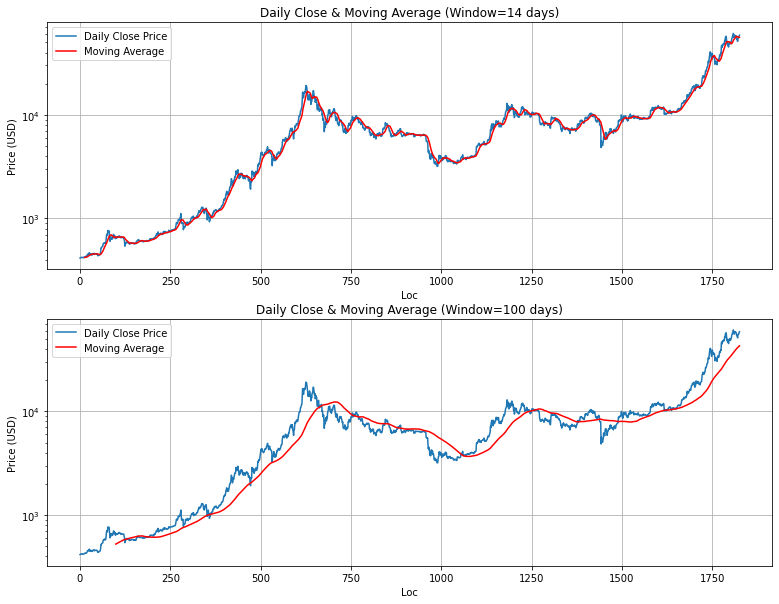

In [129]:
# Simple Moving Average

plt.figure(figsize=(13,10))

plt.subplot(2, 1, 1) 

w = 14
daily_data['Moving Average (Close)'] = daily_data['Last Close'].rolling(window=w).mean()

plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['Moving Average (Close)'], 'r-', label='Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Moving Average (Window={w} days)')
plt.grid()

plt.subplot(2, 1, 2) 

w = 100
daily_data['Moving Average (Close)'] = daily_data['Last Close'].rolling(window=w).mean() # Recalc Moving Avg

plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['Moving Average (Close)'], 'r-', label='Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Moving Average (Window={w} days)')
plt.grid()

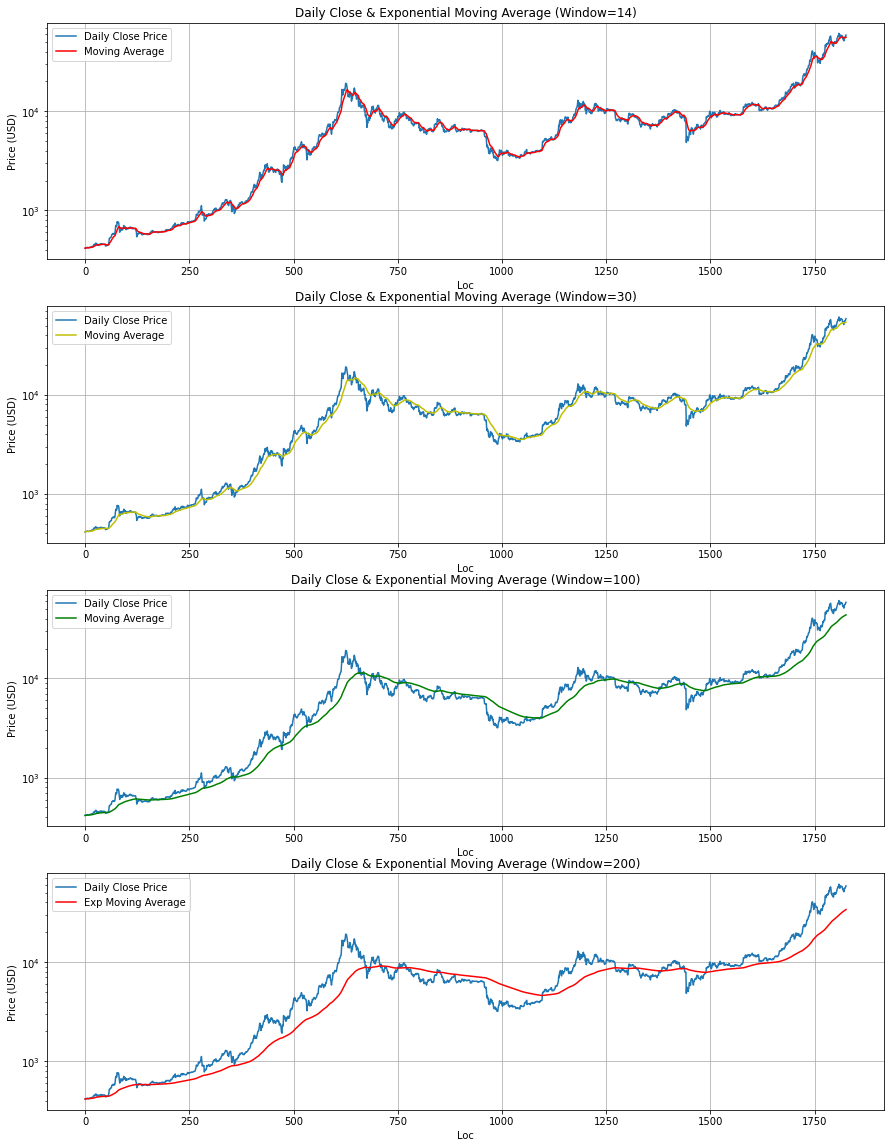

In [130]:
# Exponential Moving Average

def ema_series(data, window_size):
    data['EMA (Close)'] = data['Last Close'].ewm(span=window_size).mean()

# GRAPH: DAILY EMA
plt.figure(figsize=(15,20))

plt.subplot(4, 1, 1)
w = 14
ema_series(daily_data, w)
plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['EMA (Close)'], 'r-', label='Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Exponential Moving Average (Window={w})')
plt.grid()

plt.subplot(4, 1, 2) 
w = 30
ema_series(daily_data, w)
plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['EMA (Close)'], 'y-', label='Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Exponential Moving Average (Window={w})')
plt.grid()

plt.subplot(4, 1, 3)
w = 100
ema_series(daily_data, w)
plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['EMA (Close)'], 'g-', label='Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Exponential Moving Average (Window={w})')
plt.grid()

plt.subplot(4, 1, 4)
w = 200
ema_series(daily_data, w)
plt.plot(daily_data['Last Close'], label='Daily Close Price')
plt.plot(daily_data['EMA (Close)'], 'r-', label='Exp Moving Average')
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Loc')
plt.ylabel('Price (USD)'),
plt.title(f'Daily Close & Exponential Moving Average (Window={w})')
plt.grid()

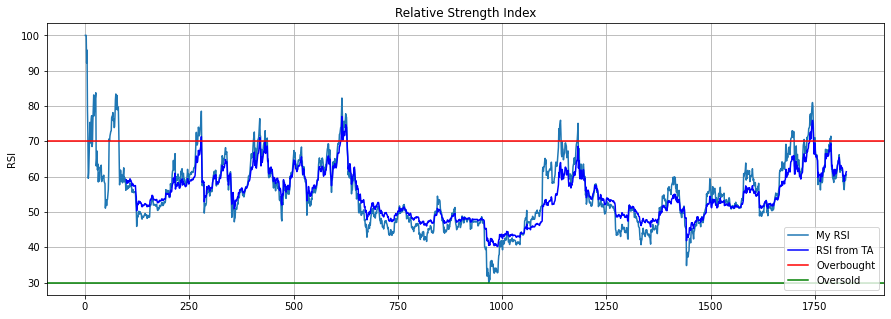

In [131]:
# Relative Strength Indicator (RSI) for DAILY

# Get the difference in price from previous step
delta = daily_data['Last Close'].diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.clip(lower=0), delta.clip(upper=0)

# Calculate the EWMA

s = 100 # Adjust Step
roll_up = up.ewm(span=s).mean()
roll_down = down.abs().ewm(span=s).mean()

# Calculate the RSI based on EWMA
RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))

# Quality Assurance
from ta import momentum
rsi = momentum.rsi(daily_data['Last Close'], s, False)
plt.figure(figsize=(15, 5))
plt.plot(RSI, label='My RSI')
plt.plot(rsi, 'b-', label='RSI from TA')
plt.axhline(y=70, color='r', linestyle='-', label='Overbought')
plt.axhline(y=30, color='g', linestyle='-', label='Oversold')
plt.legend(loc='lower right')
plt.title('Relative Strength Index')
plt.ylabel('RSI')
plt.grid()

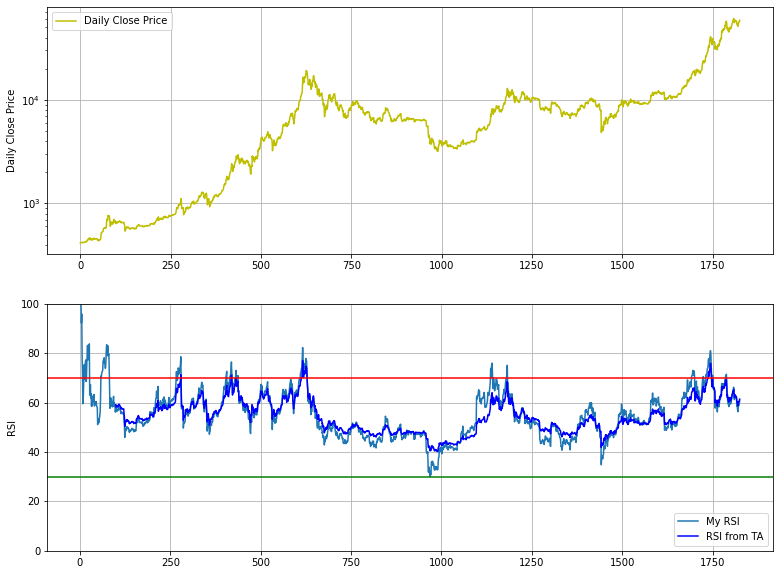

In [132]:
# DAILY CLOSE PRICE AND DAILY RSI SIDE BY SIDE

plt.figure(figsize=(13, 10))

plt.subplot(2, 1, 1) 
plt.plot(daily_data['Last Close'], 'y-',label='Daily Close Price')
plt.ylabel('Daily Close Price')
plt.yscale('log')
plt.legend(loc='upper left')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(RSI, label='My RSI')
plt.plot(rsi, 'b-', label='RSI from TA')
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.ylim([0,100])
plt.ylabel('RSI')
plt.legend(loc='lower right')
plt.grid()

In [133]:
# ROC Test

testdf = np.array([10,7,3,8,6,23,24,30,4,5,15]) # length 11
testdf = pd.Series(testdf)

n = 2  # steps
roc_series = []

for i in range(len(testdf)): # 0 to 10
    if (i>=n):
        prev = testdf.iloc[i-n]
        current = testdf.iloc[i]
        roc = ((current - prev) / prev) * 100
        roc_series.append(roc)
    else:
        roc_series.append(0)

roc_series

[0,
 0,
 -70.0,
 14.285714285714285,
 100.0,
 187.5,
 300.0,
 30.434782608695656,
 -83.33333333333334,
 -83.33333333333334,
 275.0]

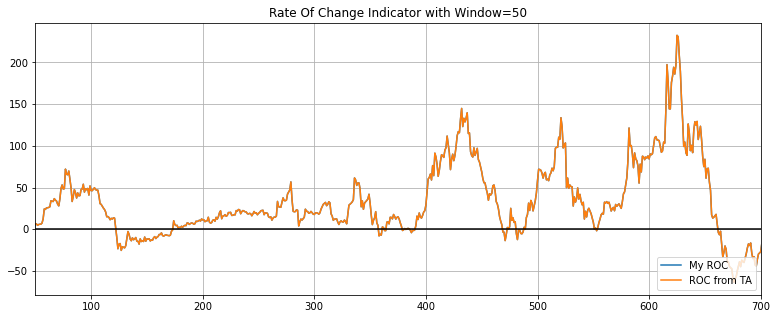

In [134]:
# Rate of Change Indicator - Daily

n = 50  # steps
roc_series = []

for i in range(len(daily_data)):
    if (i>=n):
        prev = daily_data['Last Close'].iloc[i-n]
        current = daily_data['Last Close'].iloc[i]
        roc = ((current - prev) / prev) * 100
        roc_series.append(roc)
    else:
        roc_series.append(0)

daily_data['ROC'] = roc_series
daily_data['ROC'].iloc[100:]

# GRAPH: ROC DAILY
plt.figure(figsize=(13,5))
plt.plot(daily_data['ROC'], label = 'My ROC')

# Quality Assurance
from ta import momentum
roc = momentum.roc(daily_data['Last Close'], n, False)
plt.plot(roc, label = 'ROC from TA')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlim(n,700)
plt.title(f'Rate Of Change Indicator with Window={n}')
plt.grid()
plt.legend(loc='lower right')

In [135]:
# NAIVE (RANDOM) SIMULATION

def random_simulation(print_, plot_):
    
    import random
    def make_decision_rand():
        r = random.random()
        if r < 0.33:
            return 0 # Sell
        elif r > 0.66:
            return 1 # Buy
        else:
            return 2 # Hold

    start_USD = 100000 # used for difference calculation at the end
    start_BTC = 0

    balance_USD = start_USD # updated throughout the code
    balance_BTC = start_BTC
    max_USD = 0
    min_USD = 999999999999
    max_BTC = 0
    min_BTC = 999999999999
    min_combined_USD = start_USD
    count = 0     # number of transactions (buy or sell)
    
    fee = 0.0005  # 0.05% transaction fee
    total_fees = 0  # This var will keep track of how much we pay in fees

    bal_usd = []
    bal_btc = []
    combined = []


    for i in range(len(daily_data)):

        buy_amount_USD = 10000
        sell_amount_USD = 10000
        buy_amount_BTC = 0  # 10K worth of Bitcoin
        sell_amount_BTC = 0  # 10K worth
        price = daily_data['Last Close'].iloc[i]

        if make_decision_rand() == 0:  # Sell
            sell_amount_BTC = sell_amount_USD / price

            # if bitcoin is less than $10000 worth, then you can only sell what you have
            if balance_BTC < sell_amount_USD / price:
                sell_amount_BTC = balance_BTC
                sell_amount_USD = sell_amount_BTC * price

            balance_USD += sell_amount_USD
            balance_BTC -= sell_amount_BTC
            count+=1

        elif make_decision_rand() == 1:  # Buy
            buy_amount_BTC = buy_amount_USD / price
            # if balance is less than 10000 you can only sell what you have

            if balance_USD < buy_amount_USD:
                buy_amount_USD = balance_USD
                buy_amount_BTC = buy_amount_USD / price

            balance_USD -= buy_amount_USD
            balance_BTC += buy_amount_BTC
            count+=1
        
        # Apply transaction fee
        
        total_fees += balance_USD * fee
        balance_USD = (1-fee) * balance_USD

        bal_usd.append(balance_USD)
        bal_btc.append(balance_BTC)

        # Max and Min
        combined_USD = (balance_BTC * price) + balance_USD
        combined.append(combined_USD)
        if combined_USD < min_combined_USD:
            min_combined_USD = combined_USD # get where it occurs
        
        if balance_USD > max_USD:
            max_USD = balance_USD
        if balance_USD < min_USD:
            min_USD = balance_USD
        if balance_BTC > max_BTC:
            max_BTC = balance_BTC
        if balance_BTC < min_BTC:
            min_BTC = balance_BTC
            
    total_end_net_change_USD = (combined_USD / start_USD) * 100
    
    if (print_ == True):
        print(f'Start Balance (USD)  = {start_USD}')
        print(f'End Balance (USD)    = {balance_USD}')
        print('')
        print(f'Max Balance (USD)    = {max_USD}')
        print(f'Min Balance (USD)    = {min_USD}')
        print('')
        print(f'Start Balance (BTC)  = {start_BTC}')
        print(f'End Balance (BTC)    = {balance_BTC}')
        print(f'End Balance (BTC to USD) = {balance_BTC * price}')
        print(f'Max Drawdown (USD) = {(1-(min_combined_USD/start_USD))*100}%')
        print('')
        print(f'Max Balance (BTC)    = {max_BTC}')
        print(f'Min Balance (BTC)    = {min_BTC}')
        print('')
        print(f'Total End USD: {total_end_USD}')
        print(f'Total End Net Change USD: {total_end_net_change_USD}%')
        print('')
        print(f'Total # of Transactions: {count}')
        print(f'Total Fees Paid ($): {total_fees}')
        
    if (plot_ == True):
        plt.figure(figsize=(15,15))
        plt.subplot(3, 1, 1)
        plt.plot(bal_usd, label = 'USD Balance')
        plt.title('USD Balance with Random Simulator')
        plt.subplot(3,1,2)
        plt.plot(bal_btc, 'g-', label = 'BTC Balance')
        plt.title('BTC Balance with Random Simulator')
        plt.subplot(3,1,3)
        plt.plot(combined, 'r-', label = 'Combined Balance')
        plt.title('Combined Balance with Random Simulator')
        
    
    return total_end_net_change_USD

r = random_simulation(False, False)
print(r)

229.9331852370488


In [136]:
# SIMULATION WITH SIMPLE MOVING AVG
# Rule - Sell when price is p% greater than moving avg, Buy when price is p% lower than moving avg

def MA_simulation(w, percent, print_, plot_):

    daily_data['Moving Average (Close)'] = daily_data['Last Close'].rolling(window=w).mean()
    p = percent

    def make_decision_MA(index, percent):
        ma = daily_data['Moving Average (Close)'].iloc[index]
        price = daily_data['Last Close'].iloc[index]
        if price > (1+percent) * ma:  # If price is 5% greater than moving avg
            return 1 # Buy
        elif price < (1-percent) * ma:  # If price is 5% less than moving avg
            return 0 # Sell
        else:
            return 2 # Hold


    start_USD = 100000 # used for difference calculation at the end
    start_BTC = 0

    balance_USD = start_USD # updated throughout the code
    balance_BTC = start_BTC
    max_USD = 0
    min_USD = 999999999999
    max_BTC = 0
    min_BTC = 999999999999
    min_combined_USD = start_USD
    count = 0     # number of transactions (buy or sell)

    fee = 0.0005 # 0.05% transaction fee
    total_fees = 0 # keeps track of total amount we pay in transaction fees
    
    bal_usd = []
    bal_btc = []
    combined = []

    for i in range(len(daily_data)):

        buy_amount_USD = 10000
        sell_amount_USD = 10000
        buy_amount_BTC = 0  # 10K worth of Bitcoin
        sell_amount_BTC = 0  # 10K worth
        price = daily_data['Last Close'].iloc[i]

        if make_decision_MA(i,p) == 0:  # Sell
            sell_amount_BTC = sell_amount_USD / price

            # if bitcoin is less than $10000 worth, then you can only sell what you have
            if balance_BTC < sell_amount_USD / price:
                sell_amount_BTC = balance_BTC
                sell_amount_USD = sell_amount_BTC * price

            balance_USD += sell_amount_USD
            balance_BTC -= sell_amount_BTC
            count+=1

        elif make_decision_MA(i,p) == 1:  # Buy
            buy_amount_BTC = buy_amount_USD / price
            # if balance is less than 10000 you can only sell what you have

            if balance_USD < buy_amount_USD:
                buy_amount_USD = balance_USD
                buy_amount_BTC = buy_amount_USD / price

            balance_USD -= buy_amount_USD
            balance_BTC += buy_amount_BTC
            count+=1

        # Apply transaction fee
        
        total_fees += balance_USD * fee
        balance_USD = (1-fee) * balance_USD
        
        bal_usd.append(balance_USD) # For graph
        bal_btc.append(balance_BTC) # For graph

        # Max and Min
        combined_USD = (balance_BTC * price) + balance_USD
        combined.append(combined_USD) # For graph
        if combined_USD < min_combined_USD:
            min_combined_USD = combined_USD
            
        if balance_USD > max_USD:
            max_USD = balance_USD
        if balance_USD < min_USD:
            min_USD = balance_USD
        if balance_BTC > max_BTC:
            max_BTC = balance_BTC
        if balance_BTC < min_BTC:
            min_BTC = balance_BTC

    total_end_USD = balance_BTC * price + balance_USD
    total_end_net_change_USD = (total_end_USD / start_USD) * 100
    
    if (print_ == True):
        print(f'Start Balance (USD)  = {start_USD}')
        print(f'End Balance (USD)    = {balance_USD}')
        print('')
        print(f'Max Balance (USD)    = {max_USD}')
        print(f'Min Balance (USD)    = {min_USD}')
        print('')
        print(f'Start Balance (BTC)  = {start_BTC}')
        print(f'End Balance (BTC)    = {balance_BTC}')
        print(f'End Balance (BTC to USD) = {balance_BTC * price}')
        print(f'Max Drawdown (USD) = {(1-(min_combined_USD/start_USD))*100}%')
        print('')
        print(f'Max Balance (BTC)    = {max_BTC}')
        print(f'Min Balance (BTC)    = {min_BTC}')
        print('')
        print(f'Total End USD: {total_end_USD}')
        print(f'Total End Net Change USD: {total_end_net_change_USD}%')
        print('')
        print(f'Total # of Transactions: {count}')     

    if (plot_ == True):
        plt.figure(figsize=(15,10))
        plt.subplot(3, 1, 1)
        plt.plot(bal_usd, label = 'USD Balance')
        plt.ylabel('USD Balance')
        plt.title('USD Balance with Simple Moving Average Decision Simulator')
        plt.subplot(3,1,2)
        plt.plot(bal_btc, 'g-', label = 'BTC Balance')
        plt.ylabel('USD Balance')
        plt.title('BTC Balance with Simple Moving Average Decision Simulator')
        plt.subplot(3,1,3)
        plt.plot(combined, 'r-')
        plt.title('Combined Balance with Simple Moving Average Decision Simulator')
    
    return total_end_net_change_USD

In [139]:
# SIMULATION WITH EXPONENTIAL MOVING AVG
# Rule - Sell when price is p% greater than ema, Buy when price is p% lower than ema

def EMA_simulation(window, percent, print_, plot_):

    daily_data['EMA (Open)'] = daily_data['First Open'].ewm(span=window).mean()
    p = percent

    start_USD = 100000 # used for difference calculation at the end
    start_BTC = 0

    balance_USD = start_USD # updated throughout the code
    balance_BTC = start_BTC
    max_USD = 0
    min_USD = 999999999999
    max_BTC = 0
    min_BTC = 999999999999
    min_combined_USD = start_USD
    count = 0     # number of transactions (buy or sell)
    
    fee = 0.0005 # 0.05% transaction fee
    total_fees = 0 # Keeps track of total amount we are paying for transactions

    bal_usd = []
    bal_btc = []
    combined = []

    def make_decision_EMA(index, percent):
        ema = daily_data['EMA (Open)'].iloc[index]
        price = daily_data['First Open'].iloc[index]
        if price > (1+percent) * ema:  # If price is 5% greater than moving avg
            return 1 # Buy
        elif price < (1-percent) * ema:  # If price is 5% less than moving avg
            return 0 # Sell
        else:
            return 2 # Hold

    decision = []

    for i in range(len(daily_data)):

        buy_amount_USD = 10000
        sell_amount_USD = 10000
        buy_amount_BTC = 0  # 10K worth of Bitcoin
        sell_amount_BTC = 0  # 10K worth
        price = daily_data['First Open'].iloc[i]

        decision.append(make_decision_EMA(i,p))
        
        if make_decision_EMA(i,p) == 0:  # Sell
            sell_amount_BTC = sell_amount_USD / price

            # if bitcoin is less than $10000 worth, then you can only sell what you have
            if balance_BTC < sell_amount_USD / price:
                sell_amount_BTC = balance_BTC
                sell_amount_USD = sell_amount_BTC * price

            balance_USD += sell_amount_USD
            balance_BTC -= sell_amount_BTC
            count+=1

        elif make_decision_EMA(i,p) == 1:  # Buy
            buy_amount_BTC = buy_amount_USD / price
            # if balance is less than 10000 you can only sell what you have

            if balance_USD < buy_amount_USD:
                buy_amount_USD = balance_USD
                buy_amount_BTC = buy_amount_USD / price

            balance_USD -= buy_amount_USD
            balance_BTC += buy_amount_BTC
            count+=1

        # Apply transaction fee
        
        total_fees += balance_USD * fee
        balance_USD = (1-fee) * balance_USD
        
        bal_usd.append(balance_USD) # For graph
        bal_btc.append(balance_BTC) # For graph

        # Max and Min
        combined_USD = (balance_BTC * price) + balance_USD
        combined.append(combined_USD) # For graph
        if combined_USD < min_combined_USD:
            min_combined_USD = combined_USD
            
        if balance_USD > max_USD:
            max_USD = balance_USD
        if balance_USD < min_USD:
            min_USD = balance_USD
        if balance_BTC > max_BTC:
            max_BTC = balance_BTC
        if balance_BTC < min_BTC:
            min_BTC = balance_BTC

    total_end_USD = balance_BTC * price + balance_USD
    total_end_net_change_USD = (total_end_USD / start_USD) * 100
        
    if (print_ == True):      
        print(f'Start Balance (USD)  = {start_USD}')
        print(f'End Balance (USD)    = {balance_USD}')
        print('')
        print(f'Max Balance (USD)    = {max_USD}')
        print(f'Min Balance (USD)    = {min_USD}')
        print('')
        print(f'Start Balance (BTC)  = {start_BTC}')
        print(f'End Balance (BTC)    = {balance_BTC}')
        print(f'End Balance (BTC to USD) = {balance_BTC * price}')
        print(f'Max Drawdown (USD) = {(1 - (min_combined_USD / start_USD))*100}%')
        print('')
        print(f'Max Balance (BTC)    = {max_BTC}')
        print(f'Min Balance (BTC)    = {min_BTC}')
        print('')
        print(f'Total End USD: {total_end_USD}')
        print(f'Total End Net Change USD: {total_end_net_change_USD}%')
        print('')
        print(f'Total # of Transactions: {count}')   
        print(f'Total Transaction fees paid ($): {total_fees}')
    
    if (plot_ == True):
        plt.figure(figsize=(15,15))
        plt.subplot(3, 1, 1)
        plt.plot(bal_usd)
        plt.ylabel('USD Balance')
        plt.title(f'USD Balance with Exponential Moving Avg Decision Simulator')
        plt.grid()
        plt.subplot(3,1,2)
        plt.plot(bal_btc, 'g-')
        plt.grid()
        plt.ylabel('BTC Balance')
        plt.title(f'BTC Balance with Exponential Moving Avg Decision Simulator')
        plt.subplot(3,1,3)
        plt.plot(combined, 'r-')
        plt.grid()
        plt.ylabel('Combined BTC and USD (in USD)')
        plt.title('Combined Balance with Exponential Moving Avg Decision Simulator')
    
    return total_end_net_change_USD

968.9579848825765

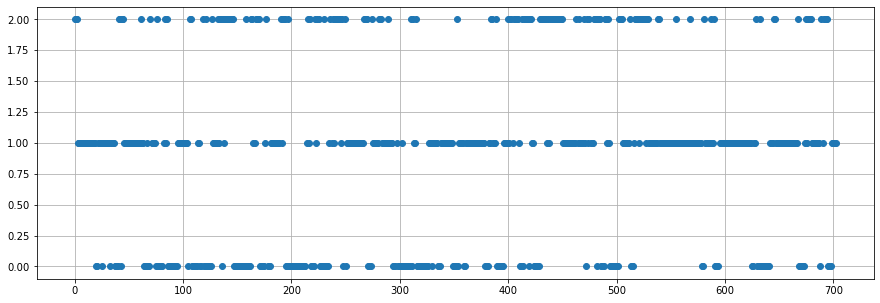

In [85]:
EMA_simulation(7, 0.01, False, False)

In [140]:
# indicator_simulation(window, percent, boolean print, boolean plot)

maximum = 0
window = [7, 14, 30, 100, 200]
percent = [0.01, 0.05, 0.10]

r = random_simulation(False, False)
maximum = r
best_i = 'Random'
best_w = 0.0
best_p = 0.0

for w in window:
    for p in percent:
        s = MA_simulation(w, p, False, False)
        e = EMA_simulation(w, p, False, False)
        if (s > maximum):
            best_i = 'Simple Moving Avg'
            best_w = w
            best_p = p
            maximum = s
        if (e > maximum):
            best_i = 'Exponential Moving Avg'
            best_w = w
            best_p = p
            maximum = e

print(f'Max Overall Percent Change USD: {maximum}%')
print(f'Indicator = {best_i}')
print(f'Window = {best_w}')
print(f'Percent = {best_p}')



Max Overall Percent Change USD: 8859.670094424431%
Indicator = Exponential Moving Avg
Window = 30
Percent = 0.01


In [142]:
#Check manually

print(MA_simulation(14, 0.01, False, False))
print(MA_simulation(30, 0.01, False, False))
print(MA_simulation(100, 0.01, False, False))
print(MA_simulation(200, 0.01, False, False))
print(MA_simulation(14, 0.05, False, False))
print(MA_simulation(30, 0.05, False, False))
print(MA_simulation(100, 0.05, False, False))
print(MA_simulation(200, 0.05, False, False))
print(MA_simulation(14, 0.10, False, False))
print(MA_simulation(30, 0.10, False, False))
print(MA_simulation(100, 0.10, False, False))
print(MA_simulation(200, 0.10, False, False))

print(f'{EMA_simulation(14, 0.01, False, False)} <--')
print(EMA_simulation(30, 0.01, False, False))
print(EMA_simulation(100, 0.01, False, False))
print(EMA_simulation(200, 0.01, False, False))
print(EMA_simulation(14, 0.05, False, False))
print(EMA_simulation(30, 0.05, False, False))
print(EMA_simulation(100, 0.05, False, False))
print(EMA_simulation(200, 0.05, False, False))
print(EMA_simulation(14, 0.10, False, False))
print(EMA_simulation(30, 0.10, False, False))
print(EMA_simulation(100, 0.10, False, False))
print(EMA_simulation(200, 0.10, False, False))


7657.465734773468
8850.637160973689
7240.414454549858
5128.701484278364
4916.39538311748
4710.70141012435
5699.001969719697
5042.906766223117
4503.558189610101
4643.979714536489
4976.788883610617
4497.251399762546
7767.401150233476 <--
8859.670094424431
7025.739691301619
6483.92882389117
4475.359431250408
5024.845292419856
5673.412963766663
6508.680203624903
4172.650675167862
4622.7351887089335
5532.386211962167
5072.082820172229


In [ ]:
# Graph all simulation combinations on one graph

daily_data['EMA (Close)'] = daily_data['Last Close'].ewm(span=window).mean()
p = percent

start_USD = 100000 # used for difference calculation at the end
start_BTC = 0
balance_USD = start_USD # updated throughout the code
balance_BTC = start_BTC
    
fee = 0.0005 # 0.05% transaction fee
total_fees =0 # Keeps track of total amount we are paying for transactions

combined = []

def make_decision_EMA(index, percent):
    ema = daily_data['EMA (Close)'].iloc[index]
    price = daily_data['Last Close'].iloc[index]
    if price > (1+percent) * ema:  # If price is 5% greater than moving avg
        return 1 # Buy
    elif price < (1-percent) * ema:  # If price is 5% less than moving avg
        return 0 # Sell
    else:
        return 2 # Hold


for i in range(len(daily_data)):

    buy_amount_USD = 10000
    sell_amount_USD = 10000
    buy_amount_BTC = 0  # 10K worth of Bitcoin
    sell_amount_BTC = 0  # 10K worth
    price = daily_data['Last Close'].iloc[i]

    if make_decision_EMA(i,p) == 0:  # Sell
        sell_amount_BTC = sell_amount_USD / price

        # if bitcoin is less than $10000 worth, then you can only sell what you have
        if balance_BTC < sell_amount_USD / price:
            sell_amount_BTC = balance_BTC
            sell_amount_USD = sell_amount_BTC * price

        balance_USD += sell_amount_USD
        balance_BTC -= sell_amount_BTC
        count+=1

    elif make_decision_EMA(i,p) == 1:  # Buy
        buy_amount_BTC = buy_amount_USD / price
        # if balance is less than 10000 you can only sell what you have
        
        if balance_USD < buy_amount_USD:
            buy_amount_USD = balance_USD
            buy_amount_BTC = buy_amount_USD / price

    balance_USD -= buy_amount_USD
    balance_BTC += buy_amount_BTC

    # Apply transaction fee
        
    total_fees += balance_USD * fee
    balance_USD = (1-fee) * balance_USD
        
    # For graph
        
    combined_USD = (balance_BTC * price) + balance_USD
    combined.append(combined_USD)
        

Start Balance (USD)  = 100000
End Balance (USD)    = 99977.00049215459
Net Change (USD)     = -22.999507845408516
Percent Change (USD) = -0.022999507845408516%

Max Balance (USD)    = 99977.00049215459
Min Balance (USD)    = 90000

Start Balance (BTC)  = 0
End Balance (BTC)    = 0.0
End Balance (BTC to USD) = 0.0
Net Change (BTC)     = 0.0

Max Balance (BTC)    = 1.9376164991920142
Min Balance (BTC)    = 0.0

Total # of Transactions: 65


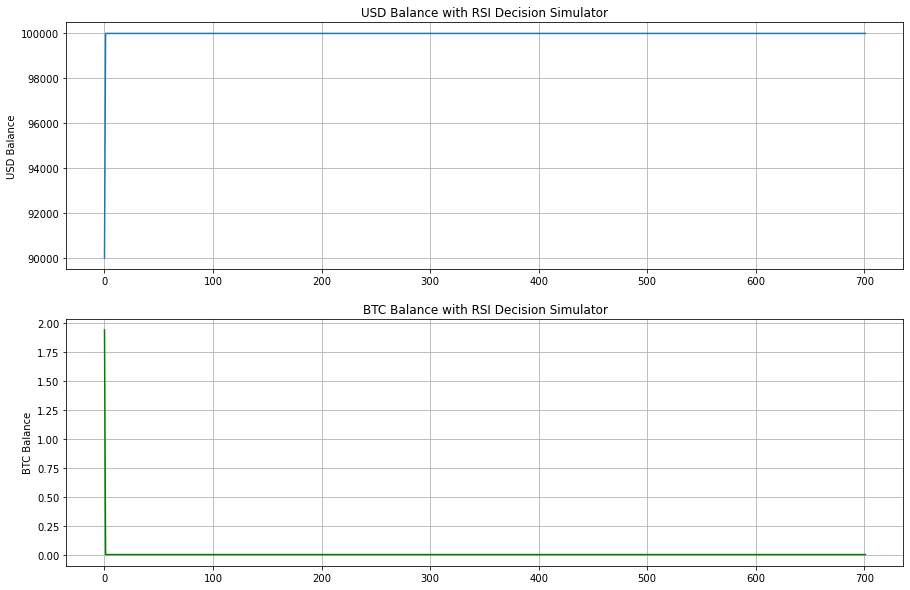

In [29]:
# SIMULATOR WITH RSI AND ROC
# Sell if overbought, buy if underbought

def make_decision_RSI(index):
    r = RSI.iloc[index]
    if r >= 70:  # If overbought
        return 0 # Sell
    elif r <= 30:  # If underbought
        return 1 # Buy
    else:
        return 2 # Hold

start_USD = 100000 # used for difference calculation at the end
start_BTC = 0

balance_USD = start_USD # updated throughout the code
balance_BTC = start_BTC
max_USD = 0
min_USD = 999999999999
max_BTC = 0
min_BTC = 999999999999
count = 0     # number of transactions (buy or sell)

bal_usd = []
bal_btc = []

for i in range(len(daily_data)-1):
    
    buy_amount_USD = 10000
    sell_amount_USD = 10000
    buy_amount_BTC = 0  # 10K worth of Bitcoin
    sell_amount_BTC = 0  # 10K worth
    price = daily_data['Last Close'].iloc[i]
    
    if make_decision_RSI(i) == 0:  # Sell
        sell_amount_BTC = sell_amount_USD / price
        
        # if bitcoin is less than $10000 worth, then you can only sell what you have
        if balance_BTC < sell_amount_USD / price:
            sell_amount_BTC = balance_BTC
            sell_amount_USD = sell_amount_BTC * price
            
        balance_USD += sell_amount_USD
        balance_BTC -= sell_amount_BTC
        count+=1
        
    elif make_decision_RSI(i) == 1:  # Buy
        buy_amount_BTC = buy_amount_USD / price
        # if balance is less than 10000 you can only sell what you have
        
        if balance_USD < buy_amount_USD:
            buy_amount_USD = balance_USD
            buy_amount_BTC = buy_amount_USD / price
        
        balance_USD -= buy_amount_USD
        balance_BTC += buy_amount_BTC
        count+=1
        
    bal_usd.append(balance_USD)
    bal_btc.append(balance_BTC)
    
    # Max and Min
    if balance_USD > max_USD:
        max_USD = balance_USD
    if balance_USD < min_USD:
        min_USD = balance_USD
    if balance_BTC > max_BTC:
        max_BTC = balance_BTC
    if balance_BTC < min_BTC:
        min_BTC = balance_BTC



print_results('RSI')

Text(0.5, 1.0, 'Renko Chart with 5.0% Increments')

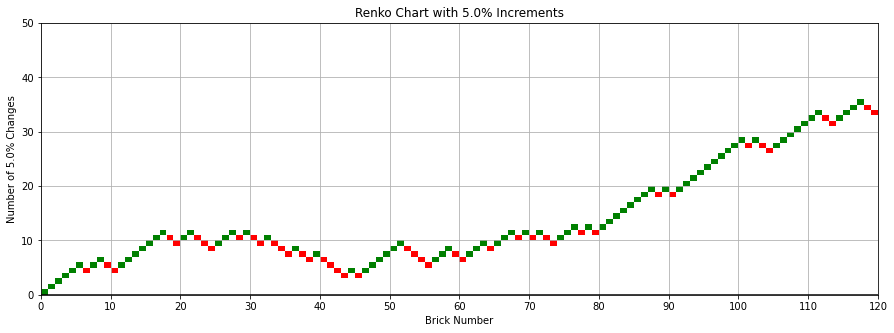

In [19]:
# RENKO CHART

# place a brick every 1% from last brick
# start at 0%, y-axis goes from -50% to +50%

from matplotlib.patches import Rectangle # Rectangle(xy, width, height, angle=0.0, facecolor=)

plt.figure(figsize=(15,5))
plt.axhline(y=0, color='black', linestyle='-')

num_bricks = 0
brick_size = 1
p = 0.05 # percent increase
x = 0 # current step
y = 0 # current step
direction = 'up'
current = daily_data['Last Close'].iloc[0]

def plot_rectangle(x, y, color):
    plt.gca().add_patch(Rectangle((x,y), brick_size, brick_size, facecolor=color))

    
def compare_price(a, b, p):
    if b >= (1+p) * a:
        # 1% increase
        return 1
    elif b <= (1-p) * a:
        # 1% decrease
        return -1

# start with one green rectangle at (0,0)
plot_rectangle(x, y, 'green')
    
for i in range(len(daily_data)):
    
    c = compare_price(current, daily_data['Last Close'].iloc[i], p)
    
    if c == 1 and direction == 'up': # If 1% increase and direction is already up
        # Make a green brick!
        x += 1
        y += 1
        plot_rectangle(x,y, 'green')
        num_bricks += 1
        current = daily_data['Last Close'].iloc[i]
        
    elif c == 1 and direction == 'down': # If 1% increase but direction was down
        # Do not create brick
        # Update direction
        direction = 'up'
        
    elif c == -1 and direction == 'down': # If 1% decrease and direction is already down
        # Make a red brick!
        x += 1
        y -= 1
        plot_rectangle(x,y, 'red')
        num_bricks += 1
        current = daily_data['Last Close'].iloc[i]
        
    elif c == -1 and direction == 'up': # If 1% decrease but direction was up
        # Do not create brick
        # Update direction
        direction = 'down'

        
plt.xticks(np.arange(0, num_bricks+1, 10))
plt.yticks(np.arange(0, y+20, 10))
plt.grid()
plt.xlabel('Brick Number')
plt.ylabel(f'Number of {p*100}% Changes'),
plt.title(f'Renko Chart with {p*100}% Increments')
# I checked manually - there are no bricks side by side

# Check why the range is not the same for 1% and 5%

In [ ]:
# Simulation with Renko Chart

# RULE: If last x amount of bricks are green, sell
# If last x amount of bricks are red, buy



In [18]:
hourly_data.to_csv(r'C:\iCloud Drive\Desktop\HourlyBitcoinData.csv')
daily_data.to_csv(r'C:\iCloud Drive\Desktop\DailyBitcoinData.csv')

In [19]:

# save hourly and daily to files
# save hourly moving average to its own file, daily moving avg to its own file

In [64]:
daily_data['Last Close']
((58760.59/5160.98)*100)/5

227.71097737251452